In [7]:
import numpy as np
import pandas as pd
import json
import clustering_benchmark_helper as cbh
from tqdm import tqdm
import importlib
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

importlib.reload(cbh)

import warnings
warnings.filterwarnings("ignore")


In [8]:
ambiguity_score_path = "../scatterplots/sampling/ambiguity_1_1.0253166008287824.npy"
ambiguity_score = np.load(ambiguity_score_path)
keys = np.load("../scatterplots/userstudy_ambiguity/keys.npy")

scatterplot_dict = {}
for i, key in enumerate(keys):
	scatterplot_dict[key] = np.load(f"../scatterplots/scatterplots/{key}")[::10]

In [61]:
scorer = cbh.davies_bouldin_scorer
hdbscan_scores = []
dbscan_scores = []
kmeans_scores = []
xmeans_scores = []
birch_scores = []
agglo_complete_scores = []
agglo_average_scores = []
agglo_single_scores = []

for key, scatterplot in tqdm(scatterplot_dict.items()):
	hdbscan_scores.append(cbh.hdbscan_scorer(scatterplot, scorer))
	dbscan_scores.append(cbh.dbscan_scorer(scatterplot, scorer))
	kmeans_scores.append(cbh.kmeans_scorer(scatterplot, scorer))
	xmeans_scores.append(cbh.xmeans_scorer(scatterplot, scorer))
	birch_scores.append(cbh.birch_scorer(scatterplot, scorer))
	agglo_complete_scores.append(cbh.agglo_scorer(scatterplot, scorer, linkage="complete"))
	agglo_average_scores.append(cbh.agglo_scorer(scatterplot, scorer, linkage="average"))
	agglo_single_scores.append(cbh.agglo_scorer(scatterplot, scorer, linkage="single"))

# for key, scatterplot in tqdm(scatterplot_dict.items()):
# 	hdbscan_scores.append(cbh.hdbscan_naive_scorer(scatterplot, scorer))
# 	dbscan_scores.append(cbh.dbscan_naive_scorer(scatterplot, scorer))
# 	kmeans_scores.append(cbh.kmeans_naive_scorer(scatterplot, scorer))
# 	xmeans_scores.append(cbh.xmeans_naive_scorer(scatterplot, scorer))
# 	birch_scores.append(cbh.birch_naive_scorer(scatterplot, scorer))
# 	agglo_complete_scores.append(cbh.agglomerative_naive_scorer(scatterplot, scorer, linkage="complete"))
# 	agglo_average_scores.append(cbh.agglomerative_naive_scorer(scatterplot, scorer, linkage="average"))
# 	agglo_single_scores.append(cbh.agglomerative_naive_scorer(scatterplot, scorer, linkage="single"))

  0%|          | 0/60 [00:00<?, ?it/s]

In [20]:
metric = "silhouette"

np.save(f"./clustering_benchmark/hdbscan_{metric}_scores.npy", hdbscan_scores)
np.save(f"./clustering_benchmark/dbscan_{metric}_scores.npy", dbscan_scores)
np.save(f"./clustering_benchmark/kmeans_{metric}_scores.npy", kmeans_scores)
np.save(f"./clustering_benchmark/xmeans_{metric}_scores.npy", xmeans_scores)
np.save(f"./clustering_benchmark/birch_{metric}_scores.npy", birch_scores)
np.save(f"./clustering_benchmark/agglo_complete_{metric}_scores.npy", agglo_complete_scores)
np.save(f"./clustering_benchmark/agglo_average_{metric}_scores.npy", agglo_average_scores)
np.save(f"./clustering_benchmark/agglo_single_{metric}_scores.npy", agglo_single_scores)

In [12]:
metric = "calinski"

hdbscan_scores = np.load(f"./clustering_benchmark/hdbscan_{metric}_scores.npy")
dbscan_scores = np.load(f"./clustering_benchmark/dbscan_{metric}_scores.npy")
kmeans_scores = np.load(f"./clustering_benchmark/kmeans_{metric}_scores.npy")
xmeans_scores = np.load(f"./clustering_benchmark/xmeans_{metric}_scores.npy")
birch_scores = np.load(f"./clustering_benchmark/birch_{metric}_scores.npy")
agglo_complete_scores = np.load(f"./clustering_benchmark/agglo_complete_{metric}_scores.npy")
agglo_average_scores = np.load(f"./clustering_benchmark/agglo_average_{metric}_scores.npy")
agglo_single_scores = np.load(f"./clustering_benchmark/agglo_single_{metric}_scores.npy")

In [13]:
## extract the index of top 1/3 ambiguity score
top_ambiguity_score_index = np.argsort(ambiguity_score)[::-1][:20]
bottom_ambiguity_score_index = np.argsort(ambiguity_score)[:20]
middle_ambiguity_score_index = np.argsort(ambiguity_score)[20:40]

index_lists      = [bottom_ambiguity_score_index, middle_ambiguity_score_index, top_ambiguity_score_index]
index_name_lists = ["Bottom 1/3", "Middle 1/3", "Top 1/3"]
scores_list = [
	hdbscan_scores,
	dbscan_scores,
	kmeans_scores,
	xmeans_scores,
	birch_scores,
	agglo_complete_scores,
	agglo_average_scores,
	agglo_single_scores
]



index_to_corrs = {}

## naive rank correlation test
for idx, index_list in enumerate(index_lists):
	corrs = []
	for i in range(len(index_list)):
		for j in range(0, i):
			i_score_list = []
			j_score_list = []
			for scores in scores_list:
				i_score_list.append(scores[index_list[i]])
				j_score_list.append(scores[index_list[j]])
			
			corr = spearmanr(i_score_list, j_score_list)
			corrs.append(corr[0])
	
	index_to_corrs[index_name_lists[idx]] = corrs


<AxesSubplot:xlabel='Correlation', ylabel='Scatterplot'>

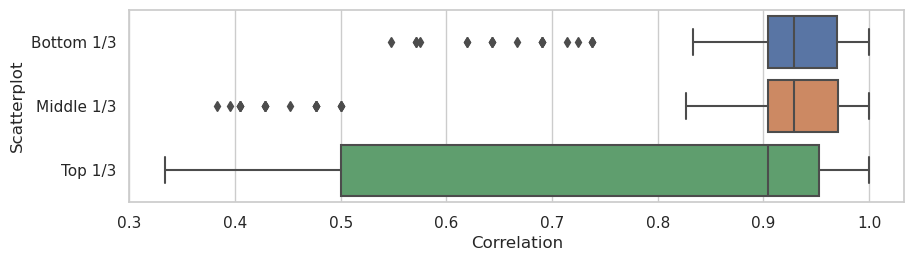

In [14]:
keys = []
values = []

for key, value in index_to_corrs.items():
  keys += [key] * len(value)
  values += value

df = pd.DataFrame({
  "Scatterplot": keys,
  "Correlation": values
})


plt.figure(figsize=(10, 2.5))
sns.set_theme(style="whitegrid")
sns.boxplot(x="Correlation", y="Scatterplot", data=df)

  

  
